<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/Lecture_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook to illustrate effect of using drop-out during training of feed-forward neural network for classifying MNIST digits dataset.

Based on excellent tutorial by Cory Maklin available at: https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


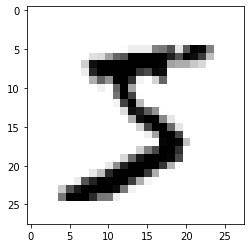

In [1]:
# Step 0: import required libraries
from keras.datasets import mnist
from matplotlib import pyplot as plt
#plt.style.use('dark_background')
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.utils import normalize, to_categorical

# Step 1: load the MNIST digits dataset pre-split into train/test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize the first training exemplar:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

In [0]:
# Normalize the input images to speed training (model convergence)
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

# Use one-hot encoding of target/output variable
# Avoids unintended relationships between output values 
#(e.g. is confusing a '3' as a '2' less bad than confusing
# a '3' as a '9'? No. So avoid 3 being "closer" to '2' than '9')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Create a model without dropout

Will:
- Create the FFNN model
- Include a 'flatten' layer to convert the input images into input vectors
- Print summary of the model, including number of parameters in each layer.


In [3]:
# Build the feed-forward neural network:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax')) # Use softmax since multi-class

# Print summary of model:
model.summary()

## Compile the model
# Use categorical crossentroly as loss function since predicting classes
# Performance measured using accurcay.
# ADAM variant of gradient descent used for training.
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)            

In [0]:
# Train the model using the training data
# Test data will evaluate degree of overfit (with/without dropout)

# Use a batch size of 32 (32 training samples chosen randomly per batch prior to updating weights)
# From the tutorial: "A batch size of 32 implies that we will compute the gradient and take a step in the direction of the gradient with a magnitude equal to the learning rate, after having pass 32 samples through the neural network. We do this a total of 10 times as specified by the number of epochs."

# Train a model without dropout.
- Train the model using the training data
- Later, test data will evaluate degree of overfit (with/without dropout)

##Training Parameters:
- Batch size of 32: (32 training samples are chosen randomly per batch prior to updating weights)
     - From the tutorial: "A batch size of 32 implies that we will compute the gradient and take a step in the direction of the gradient with a magnitude equal to the learning rate, after having pass 32 samples through the neural network. We do this a total of 10 times as specified by the number of epochs."
- Validation split parameter: that fraction of the training data is set aside (hold-out set) as a validation set. At each epoch, the loss and other stipulated metrics are evaluated on the train and validation portions of the data. Can plot these.
- Shuffle parameter: shuffles the training data before each epoch

In [5]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 54000 samples, validate on 6000 samples
Epoch 1/10





54000/54000 [==============================] - 8s 139us/step - loss: 0.2866 - acc: 0.9161 - val_loss: 0.1327 - val_acc: 0.9588
Epoch 2/10
54000/54000 [==============================] - 7s 123us/step - loss: 0.1168 - acc: 0.9639 - val_loss: 0.0983 - val_acc: 0.9695
Epoch 3/10
54000/54000 [==============================] - 6s 118us/step - loss: 0.0793 - acc: 0.9757 - val_loss: 0.0911 - val_acc: 0.9702
Epoch 4/10
54000/54000 [==============================] - 6s 117us/step - loss: 0.0592 - acc: 0.9814 - val_loss: 0.0885 - val_acc: 0.9745
Epoch 5/10
54000/54000 [==============================] - 6s 115us/step - loss: 0.0446 - acc: 0.9851 - val_loss: 0.0882 - val_acc: 0.9748
Epoch 6/10
54000/54000 [==============================] - 6s 114us/step - loss: 0.0348 - acc: 0.9882 - val_loss: 0.0955 - val_acc: 0.9742
Epoch 7/10
54000/5400

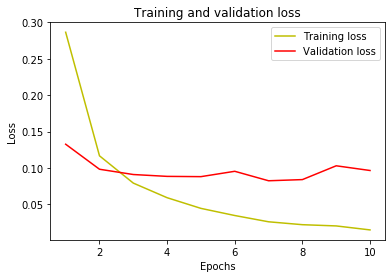

In [6]:
# We can plot the training and validation accuracies at each epoch by using
# the history variable returned by the fit function.

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Performance without dropout
Note from the above figure that the validation loss stops dropping after the first 3 epochs.

Let's look at the training and validation accuracy (will follow the same trend as the loss)

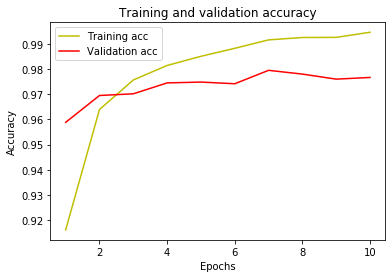

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
# Report final test accuracy (~97.4%):
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

10000/10000 [==============================] - 0s 30us/step


0.9742

# Add drop-out to the model
From the tutorial: "There’s some debate as to whether the dropout should be placed before or after the activation function. As a rule of thumb, place the dropout after the activate function for all activation functions other than ReLU."

In Keras, the parameter passed to a Dropout layer dictates the probablity of any given hidden unit having its output set to zero during a training iteration. Here, we use 0.5, which indicates a "50% chance that the output of a given neuron will be forced to 0."

In [9]:
# Rebuild the model, this time adding drop-out of 50% of nodes

model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(28, 28)))
model_dropout.add(Dense(128))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(128))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(10))
model_dropout.add(Activation('softmax'))
model_dropout.summary()

# Compile the model (same as above)
model_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
____

Train the model using dropout. Hoping to see lower validation loss and higher validation accuracy...

In [10]:
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 8s 142us/step - loss: 0.5446 - acc: 0.8325 - val_loss: 0.1559 - val_acc: 0.9545
Epoch 2/10
54000/54000 [==============================] - 8s 139us/step - loss: 0.2908 - acc: 0.9170 - val_loss: 0.1270 - val_acc: 0.9638
Epoch 3/10
54000/54000 [==============================] - 8s 147us/step - loss: 0.2432 - acc: 0.9292 - val_loss: 0.1097 - val_acc: 0.9670
Epoch 4/10
54000/54000 [==============================] - 8s 146us/step - loss: 0.2110 - acc: 0.9378 - val_loss: 0.0966 - val_acc: 0.9712
Epoch 5/10
54000/54000 [==============================] - 7s 134us/step - loss: 0.1961 - acc: 0.9425 - val_loss: 0.0935 - val_acc: 0.9710
Epoch 6/10
54000/54000 [==============================] - 7s 133us/step - loss: 0.1817 - acc: 0.9472 - val_loss: 0.0959 - val_acc: 0.9720
Epoch 7/10
54000/54000 [==============================] - 7s 132us/step - loss: 0.1704 - acc: 0.9505 - val_loss: 0.0839 - v

Note that the **validation** loss achieved above using drop-out is lower than the model that did not use drop-out (0.8 vs. 0.9). The training loss is **higher** using drop-out.

Let's plot it:

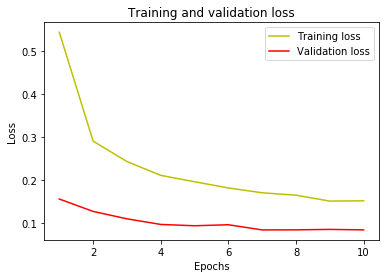

In [11]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the learning curves above, you can see that the model with dropout converges more quickly, whereas the previous model plateaued after 3 epochs.

Let's examine the training and validation accuracy (more or less follows inverse of loss function):

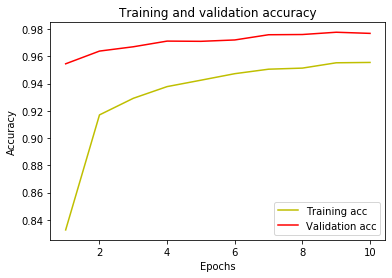

In [12]:
acc = history_dropout.history['acc']
val_acc = history_dropout.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Although the validation accuracy was much improved with dropout, when we test the final model on the withheld test data, no significant change in accuracy is observed between dropout/no-dropout. Perhaps a larger test set is required?

In [13]:
test_loss, test_acc = model_dropout.evaluate(X_test, y_test)
test_acc

10000/10000 [==============================] - 0s 33us/step


0.9714

#Final Thoughts
From Cory Maklin: "Dropout can help a model generalize by randomly setting the output for a given neuron to 0. In setting the output to 0, the cost function becomes more sensitive to neighbouring neurons changing the way the weights will be updated during the process of backpropagation."